In [43]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
sys.path.append('../hovernet')
sys.path.append('../deconvplugin')

import json
import os
import pickle
import torch
import scanpy as sc

PATH = '/home/luca/Documents/data/'

#'/cluster/CBIO/data1/lgortana/'
#'/home/luca/Documents/data/'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [44]:
#load images
adata_name = 'CytAssist_11mm_FFPE_Human_Ovarian_Carcinoma'
data_path = os.path.join(PATH, adata_name)
image_path = os.path.join(data_path, "tif/CytAssist_11mm_FFPE_Human_Ovarian_Carcinoma_tissue_image.tif")
image_dict = torch.load(os.path.join(data_path, "image_dict_64.pt"))

In [45]:
#load model infos
model_dir = '../models/alpha_0_lr_0.0001_weights_False_divergence_kl_conv_sim_unbalanced/'

with open(os.path.join(model_dir, 'info.pickle'), 'rb') as f:
    model_info = pickle.load(f)

In [47]:
import pandas as pd

#load ground truth
ground_truth = pd.read_csv(os.path.join(data_path, f'sim/4clusters_250spots_02010205_gt.csv'), index_col=0)
ground_truth.index = ground_truth.index.astype(str)

In [48]:
preds = {}
preds["pred_best"] = model_info["preds"]["pred_best"][model_info["preds"]["pred_best"].index.isin(ground_truth.index)]
preds["pred_final"] = model_info["preds"]["pred_final"][model_info["preds"]["pred_final"].index.isin(ground_truth.index)]

In [49]:
from deconvplugin.analysis import PredAnalyzer

analyzer = PredAnalyzer(model_info=model_info,
                        model_state="best",
                        preds=preds, 
                        ground_truth=ground_truth, 
                        image_dict=image_dict)

Loading predicted labels...
Loading true labels...
Use `add_attributes(seg_dict=your_seg_dict)` to add one.


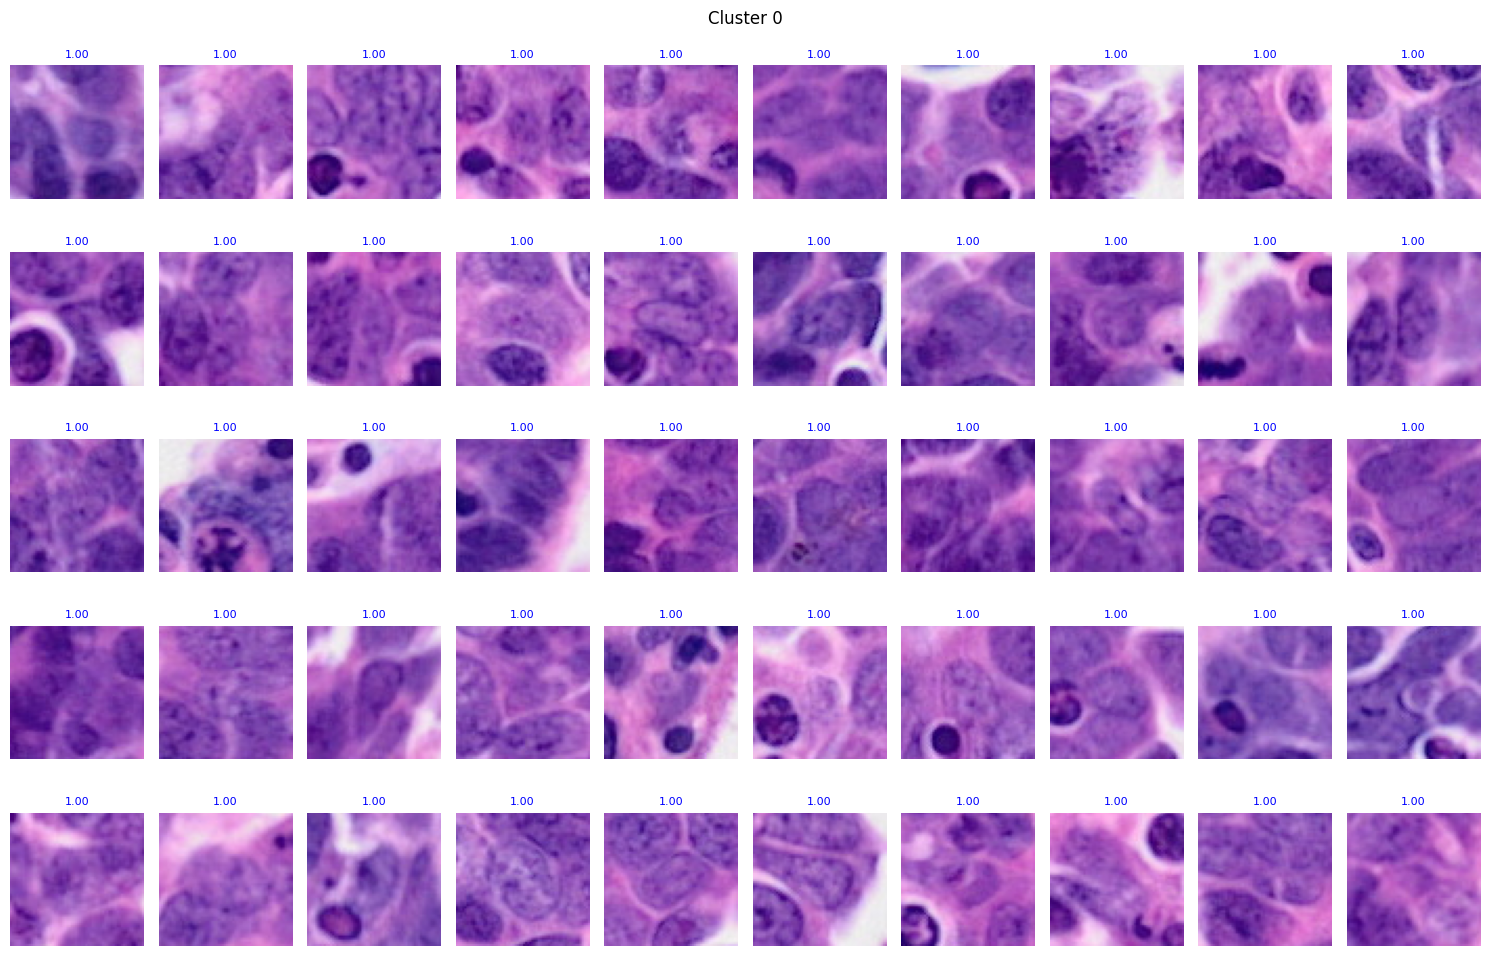

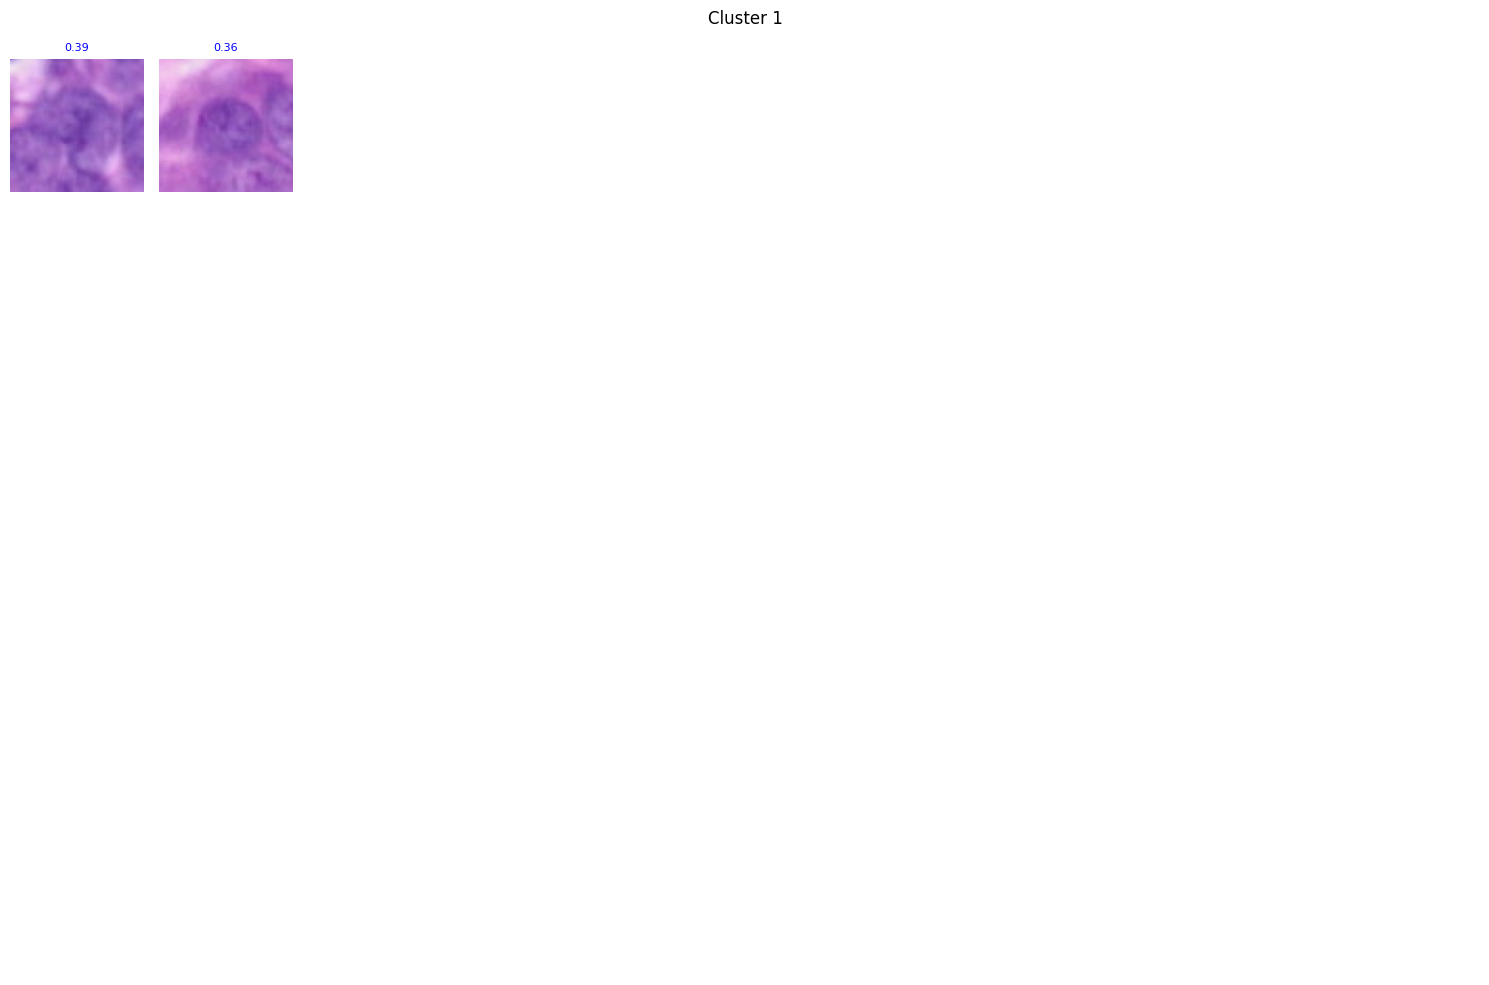

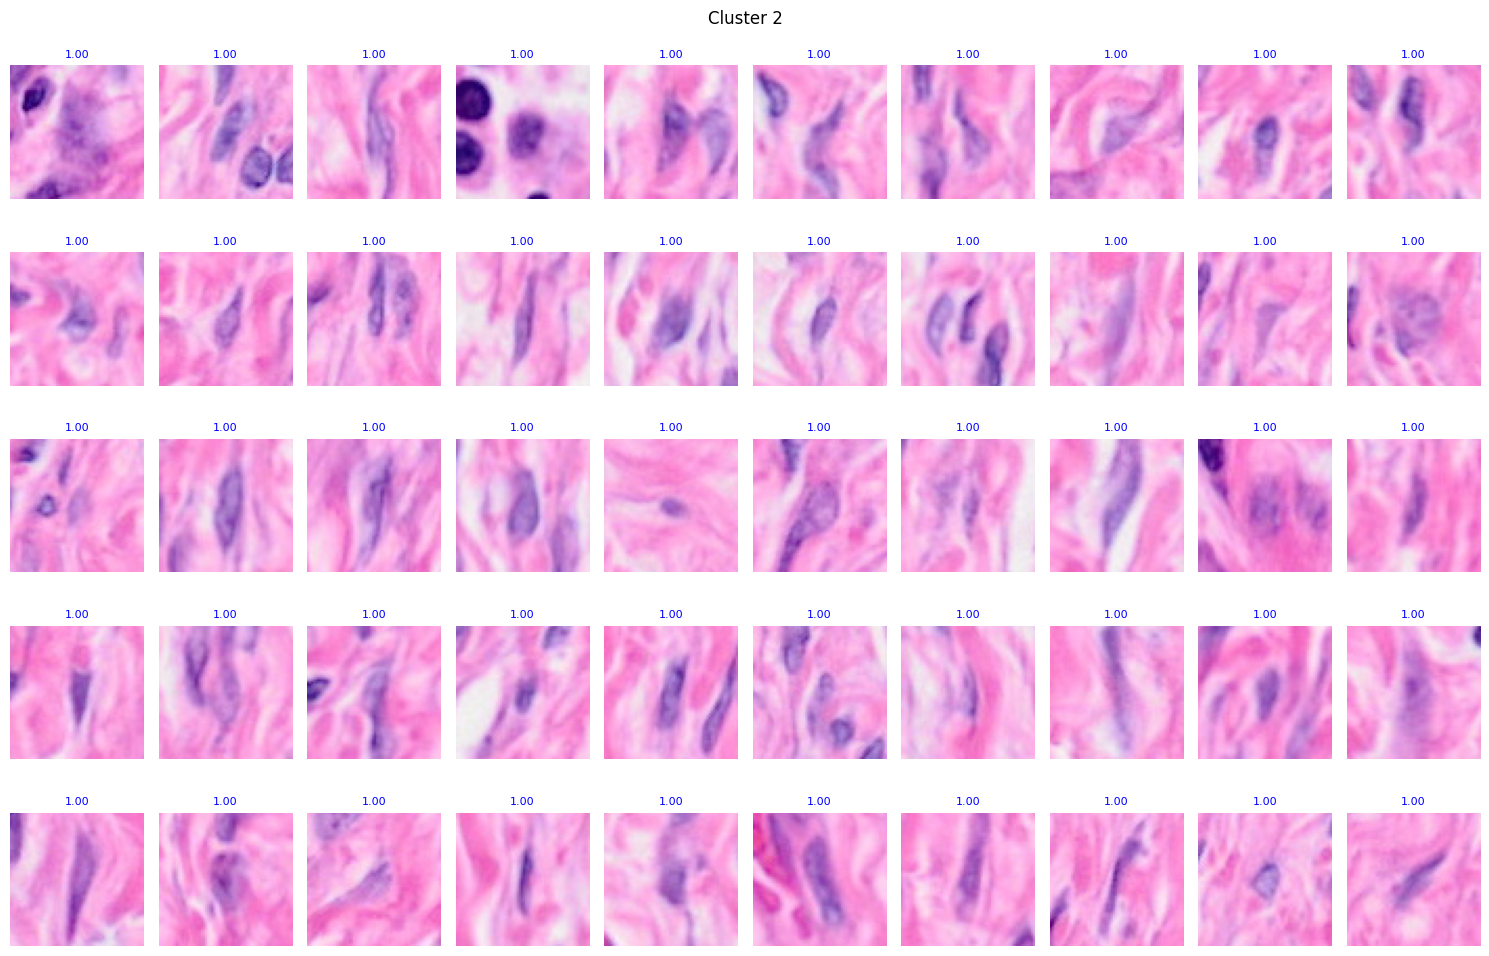

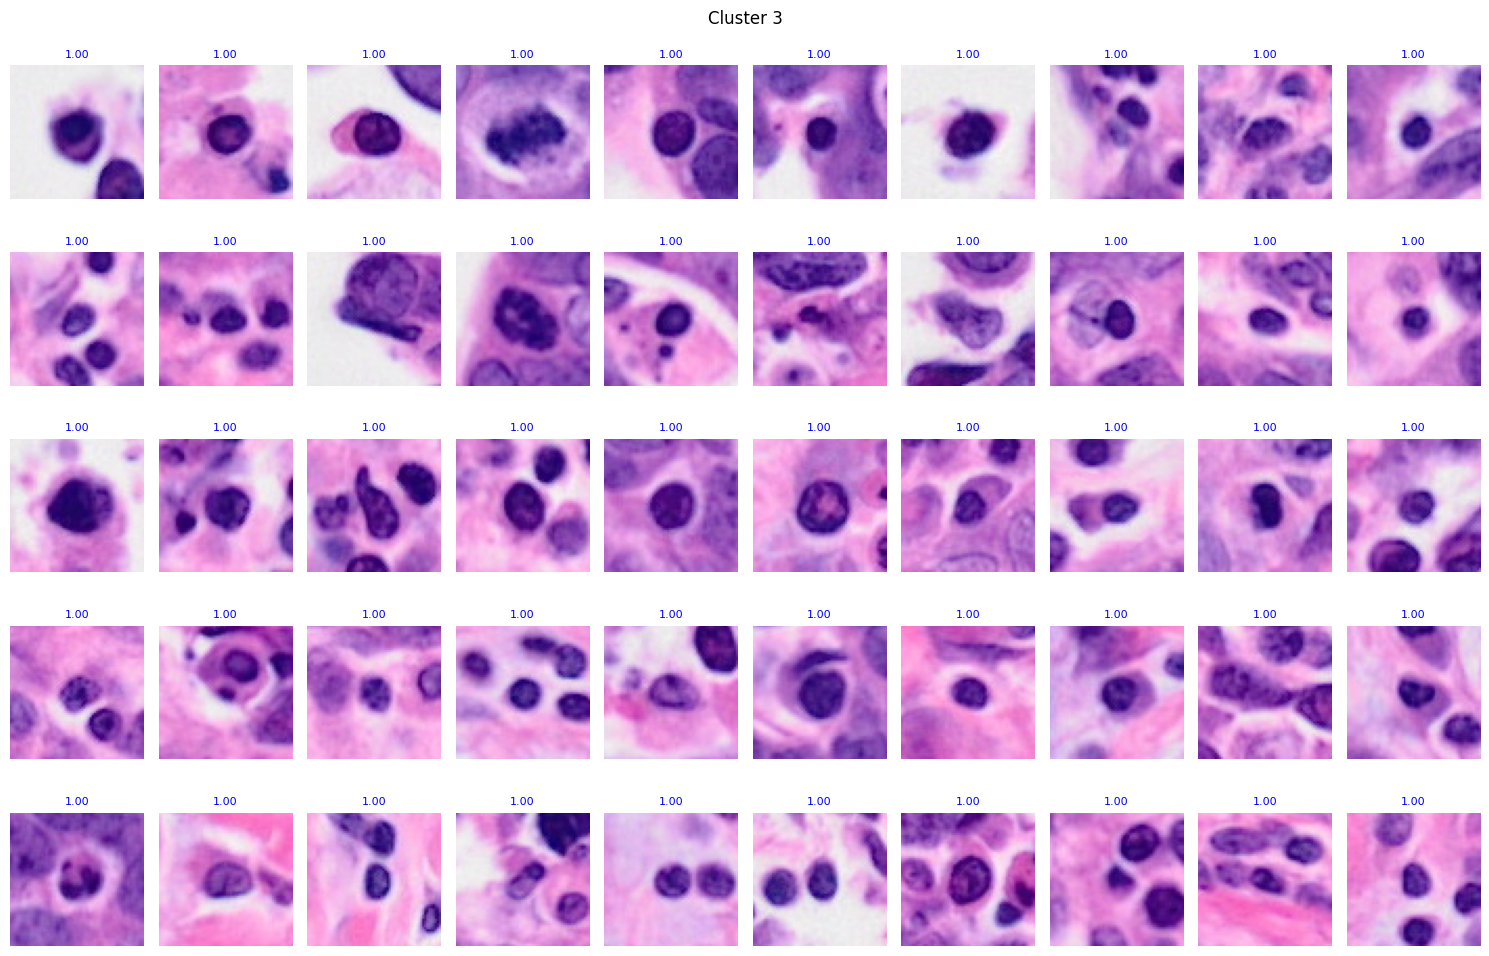

In [52]:
for ct in analyzer.ct_list:
    analyzer.plot_grid_celltype(cell_type=ct, n=50, selection="max", display=True)

Randomly selected spot_id: 39


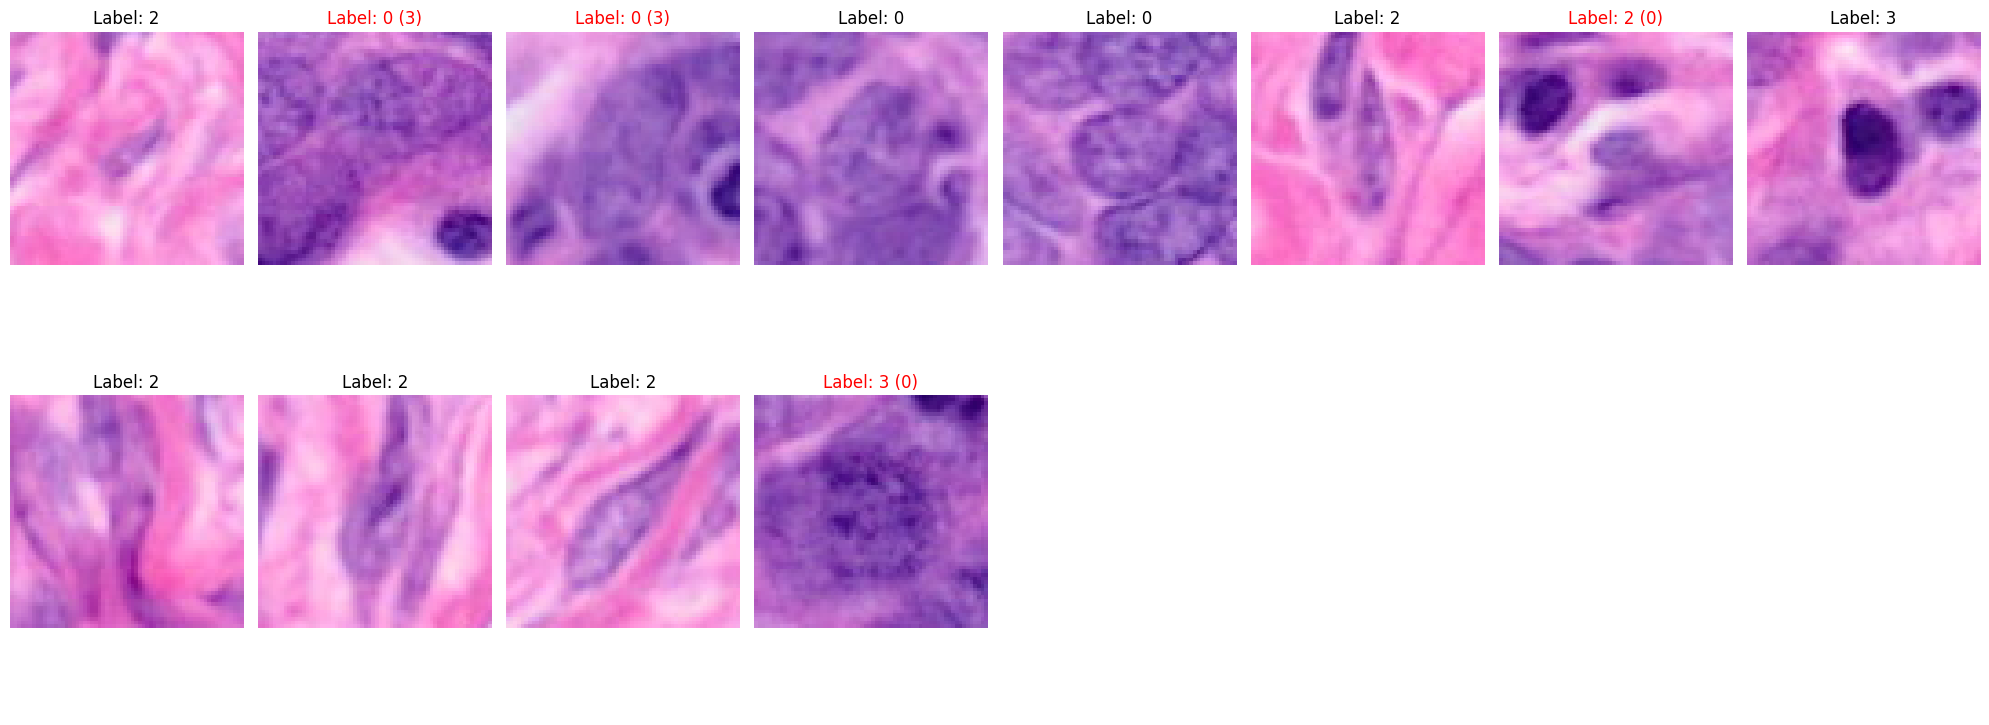

In [53]:
analyzer.plot_mosaic_cells()

Randomly selected spot_id: 11


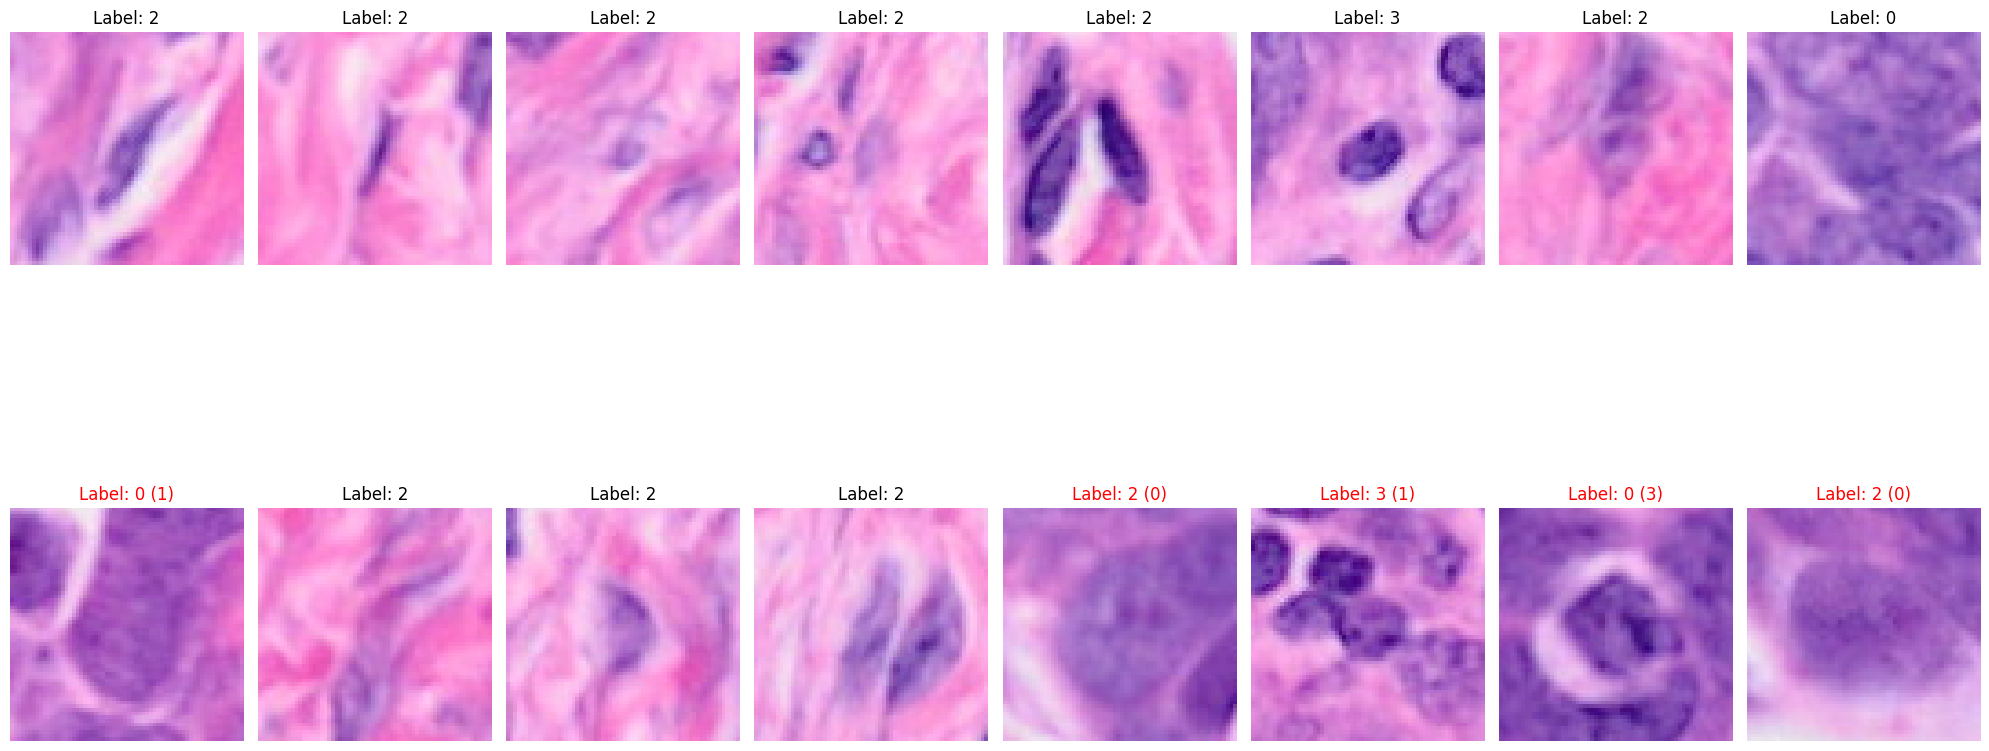

In [69]:
analyzer.plot_mosaic_cells()

In [63]:
analyzer.evaluate_spot_predictions()

{'Spearman Correlation': 0.7975036410130621,
 'Pearson Correlation': 0.878456483857474,
 'Weighted MSE': 0.002874742235867799,
 'MSE': 0.009932515291883383,
 'Weighted MAE': 0.01961185825879928,
 'MAE': 0.07351607440345577,
 'R^2 Score': 0.014007155320344772,
 'Balanced Accuracy': 0.4397995283018868,
 'Weighted F1 Score': 0.8656137758434166,
 'Weighted Precision': 0.8571183838383839,
 'Weighted Recall': 0.88}

In [72]:
perf = analyzer.evaluate_cell_predictions()

In [73]:
perf["Confusion Matrix"]

array([[1403,    2,  320,  275],
       [1132,    0,  261,  607],
       [  15,    0, 1943,   42],
       [ 433,    0,  351, 1216]])